# COMP2200/COMP6200 Assignment 1

Due date: 11:55pm on Sunday April 6th 2025

(Note that daylight savings ends earlier on that day. Remember to move your clock backward by an hour.)

## Scenario

You are working as a data scientist in a venture capital investment firm. You have been given some
data about a potential company to invest in. You will create some models to predict what the 
potential company will be like in 12 months' time.


## About this assignment

This assessment focuses on fundamental statistical analysis, which
will apply linear and logistic regression techniques on one or more
data sets.

The relevant ULO (Unit Learning Outcomes) are:

- Identify the appropriate Data Science analysis for a problem and
  apply that method to the problem.

- Interpret Data Science analyses and summarise and identify the most
  important aspects of a Data Science analysis.

- Present the results of their Data Science analyses both verbally and
  in written form.
  
Total: 15 marks
  

## Submission

Use https://classroom.github.com/a/BdRkY5OH to create a new empty
repository.

Complete this notebook and add it to a new GitHub repository.

Submit this repository via Github Classroom.

Add the video that you create (in the last step) to your GitHub repository.

You don't need to submit your CSV data file, but we won't penalise you
if you do.

## Use of Generative AI

Feel free to use Gen-AI tools (ChatGPT, Anthropic Claude, DeepSeek,
Llama, etc.) to assist you in writing the code. That's what everyone
in industry does nowadays. There are some suggested prompts at the bottom
of this notebook.

Remember that you may be called on to explain what your code does and
how it works, so if you have some code generated for you that you
don't fully understand, spend some time with your Gen-AI tool asking
for clarification until you are confident. Having a personal tutor
guide you is one of the newest and fastest ways to learn to program in
Python, so make the most of the opportunity. 

To help you remember what your code does, you can add comments to your
code either by creating another markdown cell, or by using "#" at the
beginning of a line in a code cell.

Don't use Gen-AI tools for writing reflections and observations. You
will find many cells in this notebook where you need to enter markdown text.
They appear like this:

**Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.**

You don't want to use Gen-AI in these cells for two reasons:

- Thinking and reflecting is how you will get most of the benefit of doing this assignment.

- It will produce meaningless and bland statements (that will be obviously meaningless and bland)
  and you will get bad marks.
  

## Marking Criteria

For a code cell, any working correct answer will earn full marks. For
non-working code, or code that performs a different task, if it seems
like you were on the right track, the marker may issue partial marks.

For code cells that create visualisations, a correct answer is one that
creates a meaningful and useful visualisation of the data.

For a text (markdown) cell, word counts are only a guide: this is how
many words we think it will take to give a good answer. If you need to
use more words, or can express your answer in less words, go ahead: a
good answer will still receive full marks.

Answers given as dot points in a markdown cell are acceptable;
likewise full sentences in paragraphs are acceptable.

## Resources

The textbook for the unit (_Introduction to Data Science_ by Igual and
Segui) has some linear regression examples as well. You might find
Section 6.2.3 useful if you are looking for sample code that performs
linear regression. Section 6.3.1 has an example of logistic
regression.


## Data

You will find a large zip file called `2025-S1-COMP2200-6200-assignment1.zip` on iLearn.  When you expand it
out, you will see many files, including one that begins with your
student number. e.g `1235345 Brown-Miller Group.csv`

Copy it into the same directory as you copied this Jupyter notebook.

### Create a GitHub repo within Github Classroom (0.1 marks)

- Yes, we'll give you 0.1 marks just for getting this far.

### Import any libraries you need (0.1 marks)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



If you are doing something exotic --- e.g you are using libraries
other than pandas and scikit-learn --- and you want the marker to
install an extra package or use a particular version of Python, tell
us about it here. Most students will leave this blank.



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



### Unzip and Load the Data (0.1 marks)

- Load the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [2]:
df = pd.read_csv("Company.csv")

### Inspect the Data (0.2 marks)
- List the column names using `df.columns`.

In [3]:
print(df.columns)

Index(['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue',
       'Scandals', 'Media Coverage'],
      dtype='object')


- Explore the data in those columns. Briefly describe each column in one sentence.

In [ ]:
Months Since Launch shows the number of months that has passed since the launch of the product/service
Payroll shows the total amount spent on the employees salary during the months
Revenue shows the total amount the company has generated during the months
Base 10 log Revenue shows the revenue during the months through the base-10 logarithm which is used for statistical analysis
Scandal shows the number of scandals the company has experienced during the months
Media Coverage shows sentiment of the media or general public towards the company during the months

Suggested word count: ~100 words

*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________

### Visualise Payroll Over Time (1 mark)
- Create a line plot clearly showing payroll over months since launch.

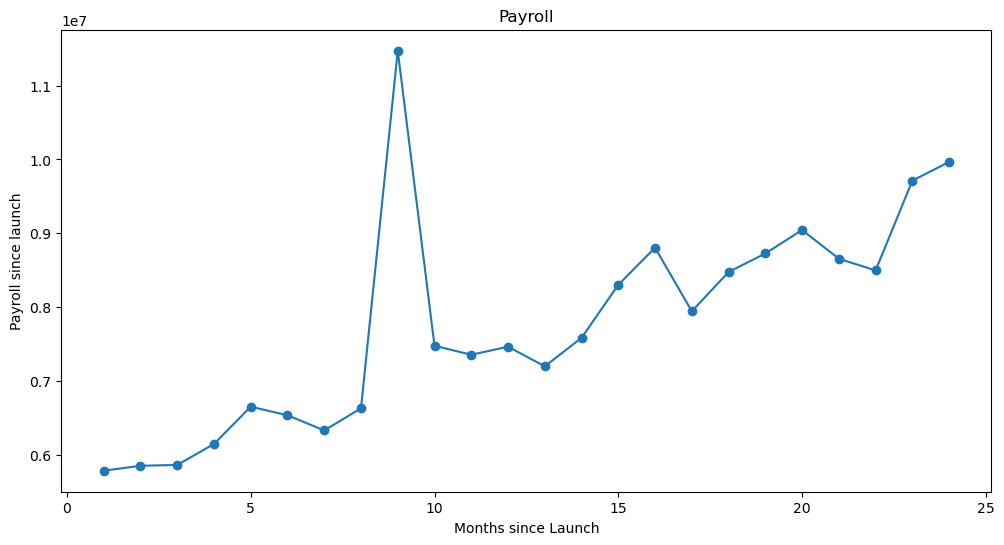

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['Months_Since_Launch'],df['Payroll'], marker='o',linestyle='-')
plt.title('Payroll')
plt.xlabel('Months since Launch')
plt.ylabel('Payroll since launch')
plt.show()

- Identify and briefly discuss any visible outliers.

In [ ]:
In this line chart we can clearly see that the most visible outlier is the one at month 10, where it is nearly double than the average value 
of the other outliers. This significant boom is due to month 10 accumulating the highest employee payroll as compared to any other months.

Suggested word count: ~50 words

*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________

## Linear Regression: Payroll (Total 3 marks)
### Step-by-step breakdown:
- (0.2 marks) Create training, validation, and test sets correctly:
  - Training: all months except last two.
  - Validation: second-last month.
  - Test: last month.

In [9]:
X = df['Months_Since_Launch']
Y = df['Payroll']
x_train = X.values[:-2].reshape(-1,1)
y_train = Y[:-2]
x_validation = X.values[-2:-1].reshape(-1,1)
y_validation = Y[-2:-1]
x_test = X.values[-1:].reshape(-1,1)
y_test = Y[-1:]

- (0.5 marks) Train an Ordinary Least Squares (OLS) regressor.

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

- (0.5 marks) Train a robust regressor. Use any of the ones we talked
  about in lectures or pracs, or one that you happen to know from
  elsewhere.

In [13]:
robust_model = HuberRegressor()
robust_model.fit(x_train, y_train)

HuberRegressor()

- (0.5 marks) Clearly identify and justify an appropriate evaluation metric.

In [ ]:
An appropriate evaluation metric to compare the different regression models would be the Mean Absolute Error(MAE). 
The reason is that MAE tends to calculate only the absolute difference between the predicted and the actual value, which makes it less sensitive as 
compared to others metrics. Since MAE would be less likely to be impacted by extreme value.

- (0.5 marks) Evaluate both models using the validation set and state which performed better.

In [15]:
y_validation_ols_pred = model.predict(x_validation)
y_validation_robust_pred = robust_model.predict(x_validation)  
validation_ols_mae = mean_absolute_error(y_validation, y_validation_ols_pred)
validation_robust_mae = mean_absolute_error(y_validation, y_validation_robust_pred)
print("OLS Regressor Validation MAE:", validation_ols_mae)
print("Huber Regressor Validation MAE:", validation_robust_mae)
if validation_ols_mae < validation_robust_mae:
    print("OLS model performed better on the validation set.")
elif validation_robust_mae < validation_ols_mae:
    print("Huber Regressor model performed better on the validation set.")
else:
    print("Both models performed equally well on the validation set.")

OLS Regressor Validation MAE: 469384.6519480534
Huber Regressor Validation MAE: 599964.2010846864
OLS model performed better on the validation set.


*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________

- (0.3 marks) Report accuracy of the best-performing model on the test set.

In [ ]:
Based on the output of the previous cell we can conclude that the OLS Model performed comparetively better than the Huber Regressor.
Since the MAE of the OLS model is closer to the actual prediction as compared to Huber. 

- (0.5 marks) Reflect on and explain why the selected model performed
  better or worse. If it was surprising or expected, explain why.
Suggested word count: ~100 words

I was expecting the Huber regressor model to perform better so it was surprising than the OLS model performed better. I assume that the huber model performed worse because it had a higher Mean Absolute erro(MAE) as compared to OLS. This outcome might be expected if the relationship between the Months since launch and payroll is largely linear and the OLS model is normally efficient in terms of assumption of linear relations and independence of errors. 
Moreoevr, the huber model is designed to be more robust to outliers and its higher MAE suggets that the perticular validation point may have not been a strong outlier causing the model to perform negatively. In this case the OLS model sensitivity to all data points, without weighting down the potential outliers, resulted in a better fit for the validation data compared to the Huber Regressor's attempt to reduce the influence of potentially anomalous points.

### Payroll Prediction (1.5 marks)
- (0.5 marks) Provide your best estimate for payroll in 12 months.

In [17]:
future_month = np.array([[36]])
predicted_payroll_36 = model.predict(future_month)
print(f"Predicted Payroll in 12 months: ${predicted_payroll_36[0]:.2f}")

Predicted Payroll in 12 months: $11124752.48


Suggested word count: ~25 words

*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



- (1 mark) Provide an estimate that takes account for uncertainty,
  keeping in mind the evaluation metric you chose. If you want to
  calculate additional metrics, you can do that here too.
  


In [ ]:
The estimate for the payroll at month 36 was $11,124,752.48 which we got using the OLS regression model. Now if we want to account for uncertainity
as per the question we would have to take into account the model performance in the validation dataset. Since, the Mean ABsolute Error(MAE) was 469,384.6
we can say with confidence that our prediction is off by this particular amount. Therefore, in order to get a more accurate prediction we would have to
add and substract the MAE with the prediction amount in order to get a more accurate prediction after accounting for uncertainity. Therefore, after the 
calculation our value lies in the range of $10,655,367 to $11,594,137 



Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



## Revenue Visualisation and Transformation (1 mark)

- (0.5 marks) Visualise revenue over time.



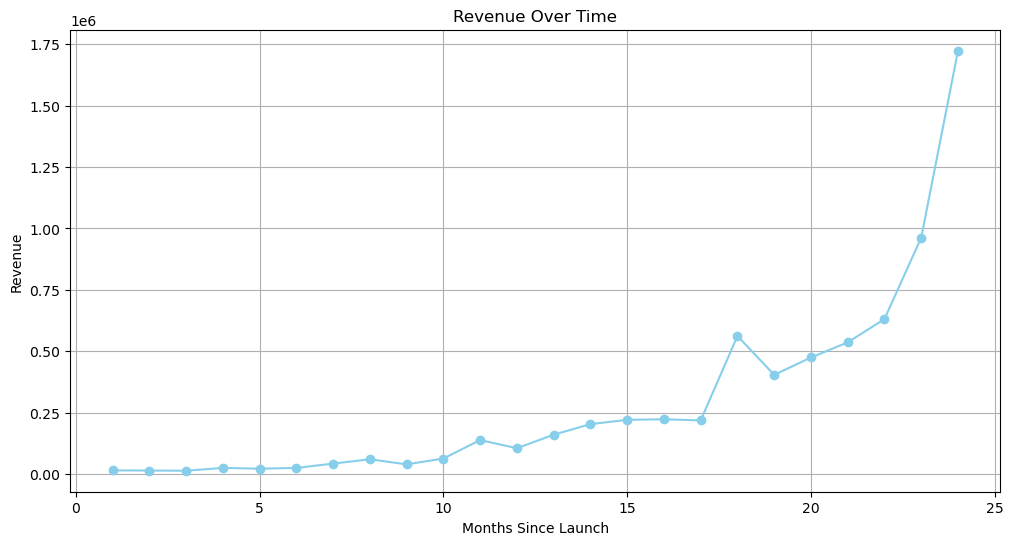

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Months_Since_Launch'], df['Revenue'], marker='o', linestyle='-', color='skyblue')
plt.title('Revenue Over Time')
plt.xlabel('Months Since Launch')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()



- (0.5 marks) Clearly explain why applying a log transformation to revenue may help linear modelling.



In [ ]:
Log transformation of revenue helps linear modeling by addressing the non lenearity elements, which is present in our growing revenue data.
The log transformation can amke the data distribution of the revenue data closer to normal which is a key assumption in a linear regression.



## Revenue Modelling (3 marks)

- (0.5 marks) Train a linear regression model (any model you choose) on the original revenue data.



In [21]:
X_revenue = df['Months_Since_Launch'].values.reshape(-1, 1)
y_revenue = df['Revenue'].values
linear_model_revenue = LinearRegression()
linear_model_revenue.fit(X_revenue, y_revenue)
print("Linear Regression Model Trained on Original Revenue Data:")
print(f"Coefficient (Slope): {linear_model_revenue.coef_[0]:.2f}")
print(f"Intercept: {linear_model_revenue.intercept_:.2f}")

Linear Regression Model Trained on Original Revenue Data:
Coefficient (Slope): 43835.25
Intercept: -260920.77


- (0.5 marks) Train a linear regression model on the log-transformed revenue data.

In [23]:
X_log_revenue = df['Months_Since_Launch'].values.reshape(-1, 1)
y_log_revenue = np.log(df['Revenue'].values)
log_linear_model_revenue = LinearRegression()
log_linear_model_revenue.fit(X_log_revenue, y_log_revenue)
print("Linear Regression Model Trained on Log-Transformed Revenue Data:")
print(f"Coefficient (Slope): {log_linear_model_revenue.coef_[0]:.4f}")
print(f"Intercept: {log_linear_model_revenue.intercept_:.4f}")

Linear Regression Model Trained on Log-Transformed Revenue Data:
Coefficient (Slope): 0.2016
Intercept: 9.1785




- (0.5 marks) Compare both models clearly and identify the better-performing model.



In [ ]:
Based on the output of the both the model we can confidently conclude that the Linear model trained on Log transformed revenue data performed 
significantly better than the other model. This is because the log transformed model in this particular case is better equipped to deal with
the revenue data 



Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



- (0.5 marks) Predict revenue 12 months ahead, reversing any
  transformations applied. Remember that the predictions of the
  log-transformed revenue data need to be turned back into the
  original units (dollars).
  


In [25]:
future_month = np.array([[36]])
predicted_log_revenue = log_linear_model_revenue.predict(future_month)[0]
predicted_revenue_log_transformed = np.exp(predicted_log_revenue)
print(f"Predicted Revenue after 12 months (Log-Transformed Model): ${predicted_revenue_log_transformed:.2f}")

Predicted Revenue after 12 months (Log-Transformed Model): $13736043.39




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



- (1 mark) Predict revenue 20 years ahead. Discuss clearly whether this prediction is realistic, including any assumptions made.



In [27]:
years_ahead = 20
months_ahead = years_ahead * 12
future_month_long_term = np.array([[24 + months_ahead]]) 
predicted_revenue_original_long_term = linear_model_revenue.predict(future_month_long_term)[0]
print(f"Predicted Revenue at {years_ahead} Years (Original Model): ${predicted_revenue_original_long_term:.2f}")
predicted_log_revenue_long_term = log_linear_model_revenue.predict(future_month_long_term)[0]
predicted_revenue_log_transformed_long_term = np.exp(predicted_log_revenue_long_term)
print(f"Predicted Revenue at {years_ahead} Years (Log-Transformed Model): ${predicted_revenue_log_transformed_long_term:.2f}")

Predicted Revenue at 20 Years (Original Model): $11311584.06
Predicted Revenue at 20 Years (Log-Transformed Model): $1254631912546075753995829248.00




Suggested word count: ~150 words



Based on the output we can see that the original model predict a revenue of 11.3 million dollars, assuming a consistent linear growth over the 20 years and  completely ignoring the market complexities and other factors like inflation or competition. Whereas, the log transformed model predicted an outrageous 12.5 septillion dollars which is obviously unrealistic. Though both the models assume that the company revenue shall grow at a consistent rate and ignores market conditions, we can easily observe that the Original model prediction is comparetively more realistic as compared to the log transformed model. However, if we are to analyse both the model individually both the model seems to be unrealistic. Only through comparison does the Original model seems realistic.




## Logistic Regression: Predicting Negative Media Coverage (3 marks)

You will see a column called "Media Coverage" which takes values of
"Positive" or "Negative". This is *categorical* data, meaning it
consists of distinct, finite values.

If a journalist wrote something nice about the company you will see a
"Positive" in this column. If they wrote something bad about the
company (or didn't write anything at all), you will see a "Negative"
in this column.

- (0.5 marks) Which features will you use to predict "Media Coverage"?

Suggested word count: ~50 words



To predict the media coverage based on a feature, it would only be logical to consider Scandal. Because a scandal can significantly impact the public and the media perception of the company. The more scandals a company finds itself into the more chance that there are likely to face negative media reporting of the company and vice versa. In conclusion, a scandal can single handedly influence the media coverage of the company.

- (0.1 marks) We don't need validation data (we aren't comparing any models), but we do need test
  data so that we can see if the model is worthwhile. Randomly select some data to act as test
  data.

In [29]:
test_fraction = 0.2
test_indices_media = df.sample(frac=test_fraction, random_state=42).index


  
- (0.1 marks) Train a logistic regression model on the training (non-test) data



In [31]:
x_media = df[['Scandals']]
y_media = df['Media Coverage'].apply(lambda x: 1 if x == 'Negative' else 0)
x_train_media, x_test_media, y_train_media, y_test_media = train_test_split(
    x_media, y_media, test_size=0.2, random_state=42, stratify=y_media
)
logistic_model = LogisticRegression()
logistic_model.fit(x_train_media, y_train_media)
print("Logistic Regression model trained.")

Logistic Regression model trained.




- (0.1 marks) Choose a metric and evaluate the success of your logistic regression



In [33]:
y_pred_media = logistic_model.predict(x_test_media)
accuracy = accuracy_score(y_test_media, y_pred_media)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60




- (0.1 marks) Examine the coefficients of the logistic regression model that you created.



In [35]:
print("Coefficient for Scandal:", logistic_model.coef_[0][0])
print("Intercept:", logistic_model.intercept_[0])

Coefficient for Scandal: 0.0
Intercept: 0.31841196925472803




- (1 mark) Clearly discuss the logistic regression coefficients and
  identify the most influential features contributing to negative
  media coverage.
  
  Suggested word count: ~150 words



As we can see that the logistic model coefficient for scandal is 0 which indicates that according to the model, a scandal has no impact on the event of media coverage. This is a rather surprising result to me because i assumed that a scandal would significantly impact the media coverage. However, based on the data the model is trained on, it seems that a scandal has virtually no effect whatsoever in influencing the media coverage of the company.
As we can see that the intercept is 0.318, in logistic regression the intercept represent the negative media coverage with the value of 1 when all the factors are 0. In this particular case, since scandal is the only factor the intercept suggest that even when there is no scandal the chances of negative media coverage is 0.318. 



- (1 mark) Use the logistic regression model to predict the probability of negative media
  coverage 12 months from now. Assume that there are no scandals in that month.
  


In [37]:
intercept = 0.3184
log_odds_negative = intercept
probability_negative = 1 / (1 + np.exp(-log_odds_negative))
print(f"The probability of negative media coverage in 12 months (no scandal) is: {probability_negative:.4f}")

The probability of negative media coverage in 12 months (no scandal) is: 0.5789




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



- (0.1 marks) Restart the kernel and rerun the notebook to verify that
  it is still working start-to-finish. Enter the "RESTARTED AND
  CHECKED" in the next cell when you have done this.
  
  Suggested word count: 3 words
  


"RESTARTED AND CHECKED"



## Written Summary of Findings (1.5 marks)

- Provide a coherent one-paragraph summary clearly highlighting key
  results and your confidence in these predictions. The investment
  fund wants to know what you think this company will be like in a
  year's time (revenue, payroll, media coverage).
  
Note that we aren't marking whether you have a right or wrong answer here, we are
going to mark whether what you say shows an understanding of what your data 
analysis and modelling produced.

If you want to add any visualisations here, you can.





Suggested word count: ~250 words



My analysis suggests that after one year there shall be a few changes for the company in terms of revenue, media coverage etc. 
As we can see in the linear regression model, the company revenue is predicted to reach 13.7 million dollars whereas the payroll is predicted to reach 
11.12 million dollars. Moreover, there is an estimated uncertainity of 468,384 dollars as per the OLS Regression model Mean Absolute Error(MAE). 
As for the media coverage the logistic regression model shows that there is a 57.9 % chance there shall be a negative media coverage towards the company
even in the absence of any Scandals. 

Now my confidence in these predictions varies depending on the column. The payroll prediction relies on the assumption that past linear trends shall 
continue consistently and not be impacted by other factors, which is obviously not going to be the case since both external and internal factors could
significantly impact the payroll. The revenue prediction from the log transformed model also assume a consistent growth patterns which proves to be 
unrealistic. Hence, we use the OLS model MAE which provides us a range and acknowledge the uncertainity that comes with predictions of different models.

Moreover, the model coefficient for Scandals being 0 shows that there is no link between the scandals and the company media coverage. 
Furthermore, the logistic regression model showed a coefficient of 57.9 % signifying a tendency for the company to experience negative media 
coverage even in the absence of scandals. In conclusion, while these models might provide some information about the company future they must be 
taken with a pinch of salt after considering factors like limited historical data and unforseen external and internal factors.




## 2-Minute Video Presentation (1.5 marks)

Some of your (non-technical) colleagues in this venture capital firm
are in other timezones, and don't know how to program, so you need to
create a video presentation for them describing your insights.

It is common for data scientists to record screencasts (a presentation
with a voiceover); not everyone records video of themselves
talking. Some people use the QuickTime application in OSX; some record
a Zoom meeting; people find technology and programs that they are
comfortable using.

Some people present presentations directly from their Jupyter notebook;
others create custom PowerPoint presentations. 

So your choices in this section are quite open. 

- (0.5 marks) Submit a video, and ensure the video is in low resolution (SD, 480p)
  so that it is small enough to upload. Keep the time to around 2
  minutes.

- (0.6 marks) State what you believe will happen to this startup over the next 12 months:
  revenue, payroll, positive/negative media coverage. (0.6 marks)
  
- (0.4 marks) Briefly discuss any limitations or assumptions you made
  in your analysis and how they might affect your predictions. Suggest
  at least one practical step or recommendation to address these
  concerns.






## Late Assessment Submission Penalty 

Unless a Special Consideration request has been submitted and
approved, a 5% penalty (of the total possible mark of the task) will
be applied for each day a written report or presentation assessment is
not submitted, up until the 7th day (including weekends). After the
7th day, a grade of ‘0’ will be awarded even if the assessment is
submitted. The submission time for all uploaded assessments is 11:55
pm. A 1-hour grace period will be provided to students who experience
a technical concern. For any late submission of time-sensitive tasks,
such as scheduled tests/exams, performance assessments/presentations,
and/or scheduled practical assessments/labs, please apply for
[Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).

For example, as this assignment is worth 15% of the entire unit, a
submission late by up to 24 hours will incur a penalty of 0.75 marks
(5% of 15 marks). A submission that is late by between 24 and 48 hours
will incur a penalty of 1.5 marks (10% of 15 marks), and so on.

## Sample Gen-AI prompts

Programming prompts:

```
Don't give me the answer directly, but help guide me to answering
this question. I will be programming in Python using the pandas and scikit-learn
libraries. If it appears that I don't know something that I would need to 
answer a question, suggest functions or classes that I should learn about. Always
add little bits of information that will guide my journey.

Here is my code so far, and the question I am trying to answer
(....)
```

If you are concerned about your grammar or language, try a prompt like this:

```
Find any grammatical mistakes, typos or other language errors in this
text. Don't make the corrections, just list for me what was wrong and
explain the problem.
```

